In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from tensorflow.keras import layers
# from tensorflow.keras.utils import to_categorical

In [1]:
def sigmoid(x):
  fx=np.exp(x)
  sum=np.sum(fx,axis=1,keepdims=True)
  sig=fx/sum
  return sig

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [18]:
print(x_test.shape)

(10000, 28, 28)


In [19]:
x_valid,x_test,y_valid,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=20)

In [22]:
x_train_f=x_train.reshape(x_train.shape[0],-1)
x_test_f=x_test.reshape(x_test.shape[0],-1)
x_valid_f=x_valid.reshape(x_valid.shape[0],-1)

In [23]:
print(x_train_f.shape)
print(y_train.shape)

(60000, 784)
(60000,)


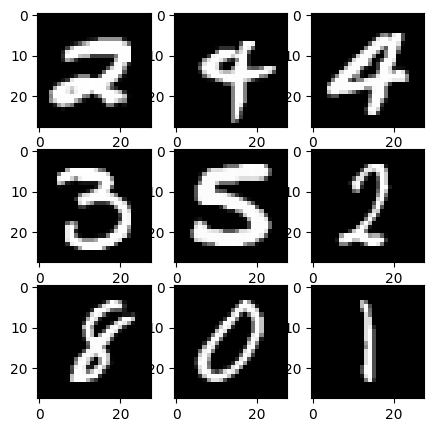

In [24]:

images = x_train[np.random.randint(1, x_train.shape[0], size=9)]
fig, ax = plt.subplots(3, 3, figsize=(5,5))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(images[i * 3 + j], cmap='gray')
plt.show()


In [25]:
model=Sequential(
    [
        tf.keras.layers.Input(shape=(28*28,)),
        Dense(25,activation='relu'),
        Dense(15,activation='relu'),
        Dense(10,activation='linear')
    ]
)

In [26]:
model.build()

In [27]:
from keras.src.engine.training import optimizer
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-03),
    metrics=['accuracy']
)

In [15]:
print(x_train_f.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [31]:
history=model.fit(
    x_train_f,y_train,
    epochs=20,
    validation_data=(x_valid_f,y_valid),
    verbose=2,
    shuffle=True,
    use_multiprocessing=True)

Epoch 1/20
1875/1875 - 8s - loss: 0.1334 - accuracy: 0.9622 - val_loss: 0.2192 - val_accuracy: 0.9444 - 8s/epoch - 4ms/step
Epoch 2/20
1875/1875 - 4s - loss: 0.1303 - accuracy: 0.9622 - val_loss: 0.1993 - val_accuracy: 0.9510 - 4s/epoch - 2ms/step
Epoch 3/20
1875/1875 - 5s - loss: 0.1320 - accuracy: 0.9625 - val_loss: 0.2189 - val_accuracy: 0.9464 - 5s/epoch - 2ms/step
Epoch 4/20
1875/1875 - 6s - loss: 0.1283 - accuracy: 0.9628 - val_loss: 0.2170 - val_accuracy: 0.9498 - 6s/epoch - 3ms/step
Epoch 5/20
1875/1875 - 4s - loss: 0.1315 - accuracy: 0.9635 - val_loss: 0.2255 - val_accuracy: 0.9430 - 4s/epoch - 2ms/step
Epoch 6/20
1875/1875 - 4s - loss: 0.1242 - accuracy: 0.9639 - val_loss: 0.2268 - val_accuracy: 0.9466 - 4s/epoch - 2ms/step
Epoch 7/20
1875/1875 - 6s - loss: 0.1242 - accuracy: 0.9643 - val_loss: 0.2160 - val_accuracy: 0.9470 - 6s/epoch - 3ms/step
Epoch 8/20
1875/1875 - 4s - loss: 0.1225 - accuracy: 0.9643 - val_loss: 0.2356 - val_accuracy: 0.9482 - 4s/epoch - 2ms/step
Epoch 9/

In [32]:
y_test_pred=model.predict(x_test_f)

157/157 [==============================] - 0s 2ms/step


In [35]:
pred=tf.nn.softmax(y_test_pred)

In [39]:
pred=np.asarray(pred)

In [41]:
pred.shape

(5000, 10)

In [37]:
predicted=np.argmax(pred,axis=1)

In [42]:
accuracy_score(y_test,predicted)

0.9494

In [43]:
precision_score(y_test,predicted,average='weighted')

0.9502263332608454

In [44]:
indices=(y_test!=predicted)*1
y=y_test[y_test!=predicted]
y_p=predicted[y_test!=predicted]
wrongs=x_test[y_test!=predicted]

In [45]:
wrongs.shape

(253, 28, 28)

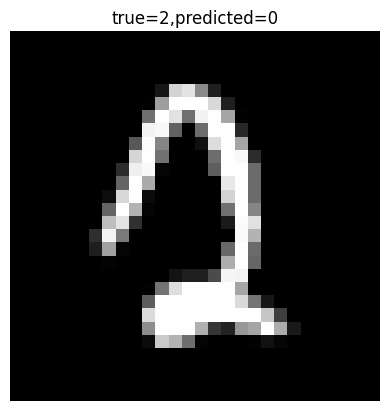

In [51]:
index=np.random.randint(0,wrongs.shape[0])
plt.imshow(wrongs[index],cmap='gray')
plt.axis('off')
plt.title(f'true={y[index]},predicted={y_p[index]}')
plt.show()

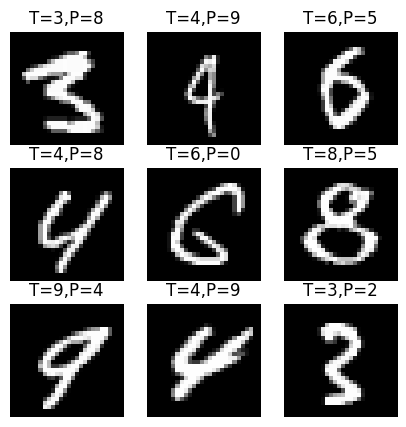

In [52]:
indices=np.random.randint(0,wrongs.shape[0],size=9)
fig,ax=plt.subplots(3,3,figsize=(5,5))
for i in range(3):
  for j in range(3):
    index=indices[(i*3)+j]
    ax[i][j].imshow(wrongs[index],cmap='gray')
    ax[i][j].set_title(f'T={y[index]},P={y_p[index]}')
    ax[i][j].axis('off')
plt.show()

In [53]:
cnn_model=Sequential(
    [
        layers.Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(20,(3,3),activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Flatten(),
        layers.Dense(25,activation='relu'),
        layers.Dense(10,activation='softmax')
    ]
)
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-04),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [54]:
cnn_model.fit(
    x_train,y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_valid,y_valid),
    shuffle=True,
    use_multiprocessing=True
)

Epoch 1/20
1875/1875 [==============================] - 51s 27ms/step - loss: 2.2766 - accuracy: 0.2914 - val_loss: 1.4585 - val_accuracy: 0.4854
Epoch 2/20
1875/1875 [==============================] - 52s 27ms/step - loss: 1.1295 - accuracy: 0.6274 - val_loss: 0.9035 - val_accuracy: 0.7664
Epoch 3/20
1875/1875 [==============================] - 53s 29ms/step - loss: 0.7299 - accuracy: 0.8100 - val_loss: 0.5323 - val_accuracy: 0.9102
Epoch 4/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4081 - accuracy: 0.9091 - val_loss: 0.2898 - val_accuracy: 0.9332
Epoch 5/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2137 - accuracy: 0.9472 - val_loss: 0.1867 - val_accuracy: 0.9524
Epoch 6/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1515 - accuracy: 0.9615 - val_loss: 0.1670 - val_accuracy: 0.9584
Epoch 7/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1213 - accuracy: 0.9683 - val_loss: 0.1269 -

In [55]:
cnn_model.evaluate(x_test,y_test)

157/157 [==============================] - 1s 9ms/step - loss: 0.0674 - accuracy: 0.9832


[0.06738270074129105, 0.9832000136375427]

In [56]:
pred=cnn_model.predict(x_test)

157/157 [==============================] - 2s 14ms/step


In [57]:
pred=np.argmax(pred,axis=1)

In [58]:
indices=y_test!=pred

In [59]:
wrongs=x_test[indices]

In [60]:
wrongs.shape

(84, 28, 28)

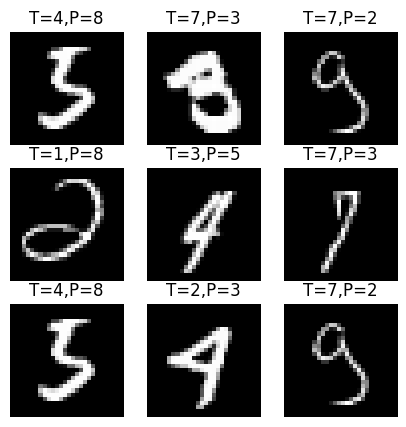

In [61]:
indices=np.random.randint(0,wrongs.shape[0],size=9)
fig,ax=plt.subplots(3,3,figsize=(5,5))
for i in range(3):
  for j in range(3):
    index=indices[(i*3)+j]
    ax[i][j].imshow(wrongs[index],cmap='gray')
    ax[i][j].set_title(f'T={y[index]},P={y_p[index]}')
    ax[i][j].axis('off')
plt.show()